In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

### Emloyee Attrition Data of Jio

In [2]:
df = pd.read_csv("EmployeeAttrition.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.shape

(1470, 35)

In [6]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

#### Display all the object data types

In [ ]:
df.select_dtypes(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


#### Encoding the categorical features

1. Using apply method -

In [8]:
# encoding using df.apply()
df['Attrition'] = df['Attrition'].apply(lambda x:1 if x=='Yes' else 0)

2. Using built-in encoding technique -

In [9]:
# encoding using TargetEncoder
from category_encoders import TargetEncoder
encoder = TargetEncoder(cols=['EducationField'])
df['EducationField'] = encoder.fit_transform(df['EducationField'], df['Attrition'])

In [10]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,0.146865,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,0.146865,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,0.134201,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,0.146865,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,0.135776,1,7,...,4,80,1,6,3,3,2,2,2,2


---

### Accessing the preprocessed data

#### Loading the pickle files

In [11]:
X_train = pd.read_csv('X_train.csv')
y_train = pd.read_csv('y_train.csv')
X_test = pd.read_csv('X_test.csv')
y_test = pd.read_csv('y_test.csv')

In [12]:
X_train.head()

,Unnamed: 0,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,34,0.249097,669,0.138398,1,3,0.135776,1,1184,...,3,80,0,14,3,3,13,9,4,9
1,1,35,0.149569,1224,0.206278,7,4,0.146865,1,1962,...,4,80,0,10,2,3,10,8,0,9
2,2,46,0.149569,1277,0.206278,2,3,0.146865,1,1732,...,2,80,1,13,5,2,10,6,0,3
3,3,35,0.149569,660,0.206278,7,1,0.146865,1,1492,...,1,80,1,1,3,3,1,0,0,0
4,4,26,0.249097,342,0.138398,2,3,0.146865,1,1053,...,2,80,1,6,2,3,3,2,1,2


In [13]:
y_train.head()

,Unnamed: 0,Attrition
0,0,0
1,1,0
2,2,0
3,3,0
4,4,1


In [14]:
X_test.head()

,Unnamed: 0,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,880,32,0.249097,116,0.138398,13,3,0.134201,1,1234,...,3,80,1,2,2,3,2,2,2,2
1,1275,51,0.149569,942,0.138398,3,3,0.242423,1,1786,...,4,80,0,15,2,3,2,2,2,2
2,891,44,0.149569,1117,0.138398,2,1,0.146865,1,1246,...,4,80,1,10,5,3,10,5,7,7
3,1060,24,0.249097,381,0.138398,9,3,0.135776,1,1494,...,3,80,0,4,2,2,0,0,0,0
4,1253,33,0.080000,1283,0.206278,2,3,0.220126,1,1756,...,4,80,0,13,2,2,11,7,1,7


In [15]:
y_test.head()

,Unnamed: 0,Attrition
0,880,0
1,1275,0
2,891,0
3,1060,1
4,1253,0


---

### Model Building  - Decision Tree Classifier

In [16]:
from sklearn.tree import DecisionTreeClassifier


In [17]:
model = DecisionTreeClassifier()

In [18]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [19]:
model.score(X_train, y_train)

ValueError: multiclass-multioutput is not supported

In [62]:
model.score(X_test, y_test)

0.0

The above results shows that the model is overfitting the data

#### Hyperparameter Tuning to reduce overfitting

In [ ]:
from sklearn.model_selection import KFold, cross_validate, cross_val_score

In [ ]:
kfold = KFold(n_splits=10)

depths = [3,4,5,6,7,8,9,10]

for d in depths:

    model = DecisionTreeClassifier(random_state=0, max_depth=d)

    cv_acc_results = cross_validate(model, X_train, y_train, cv = kfold,
                                    scoring = 'accuracy', return_train_score = True)
    mean_train_score = cv_acc_results['train_score'].mean()*100
    mean_val_score = cv_acc_results['test_score'].mean()*100

    print(f"K-Fold for depth:{d}")
    print(f"Accuracy Mean -\nTrain: {mean_train_score}, Validation: {mean_val_score}")
    print('\n')

K-Fold for depth:3
Accuracy Mean -
Train: 75.5622020687549, Validation: 65.09306260575295


K-Fold for depth:4
Accuracy Mean -
Train: 80.39818694669911, Validation: 74.60365072040199


K-Fold for depth:5
Accuracy Mean -
Train: 84.86297138658678, Validation: 76.22622160693227


K-Fold for depth:6
Accuracy Mean -
Train: 87.97250891699247, Validation: 78.65969338050557


K-Fold for depth:7
Accuracy Mean -
Train: 90.95824552285094, Validation: 81.03753268727888


K-Fold for depth:8
Accuracy Mean -
Train: 93.69670907494067, Validation: 81.19161154694149


K-Fold for depth:9
Accuracy Mean -
Train: 95.4398206547959, Validation: 81.95021278777624


K-Fold for depth:10
Accuracy Mean -
Train: 97.04231848759208, Validation: 83.26539506742552




- From above hyperparameter tuning we select the best depth at d = 4
- Therefore, building the final model using the best hyperparameter

In [ ]:
d = 4

In [ ]:
model = DecisionTreeClassifier(max_depth=d)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [ ]:
model.score(X_train, y_train)

0.8102226720647774

In [ ]:
model.score(X_test, y_test)

0.7312925170068028

Using only accuracy metric, the performance of the model cannot be judged, therefore creating its confusion matrix

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cnf_matrix = confusion_matrix(y_test, pred)
cnf_matrix

array([[190,  55],
       [ 24,  25]], dtype=int64)

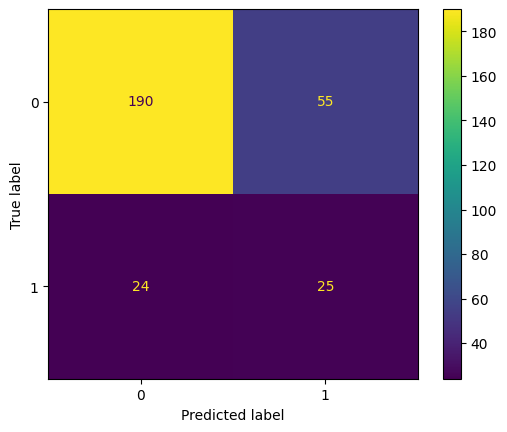

In [ ]:
ConfusionMatrixDisplay(cnf_matrix).plot()
plt.show()

#### Visualizing the Important Features

In [ ]:
importances = model.feature_importances_

In [ ]:
indices = np.argsort(importances)[::-1]

In [ ]:
names = [X_train.columns[i] for i in indices]

In [ ]:
names

['JobRole',
 'JobSatisfaction',
 'StockOptionLevel',
 'RelationshipSatisfaction',
 'EnvironmentSatisfaction',
 'BusinessTravel',
 'MonthlyRate',
 'YearsSinceLastPromotion',
 'JobInvolvement',
 'MonthlyIncome',
 'PercentSalaryHike',
 'YearsWithCurrManager',
 'Gender',
 'EmployeeCount',
 'EmployeeNumber',
 'EducationField',
 'Education',
 'DistanceFromHome',
 'Department',
 'DailyRate',
 'HourlyRate',
 'MaritalStatus',
 'JobLevel',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PerformanceRating',
 'StandardHours',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'Age']

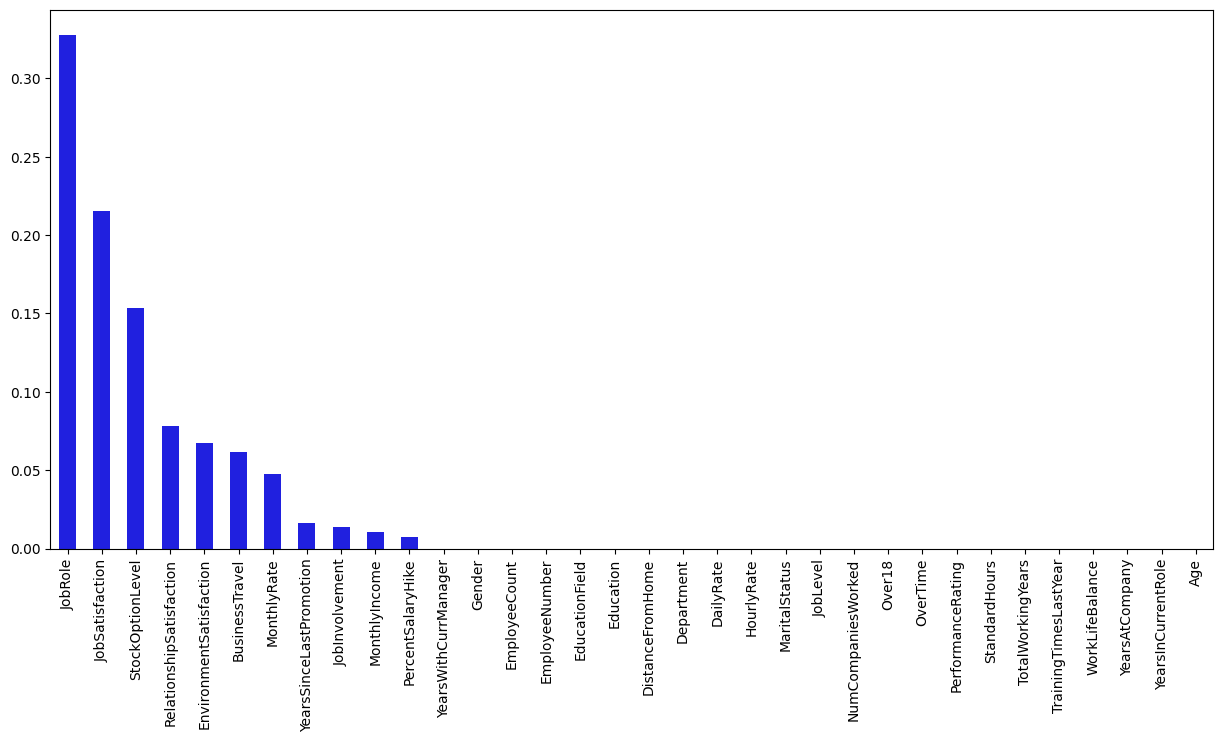

In [ ]:
plt.figure(figsize=(15, 7))
sns.barplot(x = names, y = importances[indices], color='blue', width=0.5)
plt.xticks(rotation=90)
plt.show()